# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [109]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [110]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('C:/Users/Esme/Desktop/SpringBoard/Lesson_8_Jupyter_Human_Temp/1508961248_hospital_readmit/hospital_readmit/data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [111]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[: , 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


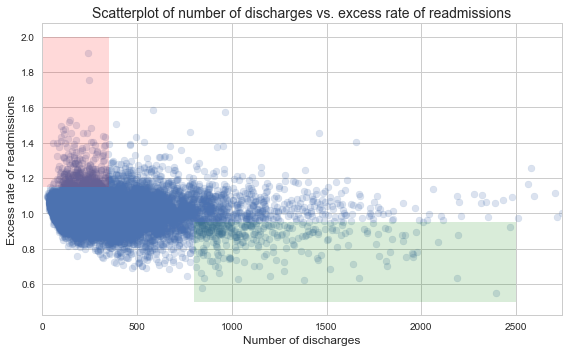

In [112]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## A. Do I agree?
    There does seem to be a correlation between lower number of discharges and higher chance of readmission (B/Stats under analysis above) however I am not convinced from this scatter graph that it is as strong as they state. Furthermore, their final analytical finding that size of the hosptial is tied to readmission rates. That seems like a logical jump needing more information to be true (specifically a ratio of hospital size or beds/ discharge rate) 
    Therefore their results are based on an inference of the data not supported by analysis or a clear logical requirments - and worse they do not acknowledge that inference (therefore misleading the representation of findings).
    Even if taking their results without the inference (i.e. discharge rate directly correlates to the number of beds) their findings are circumspect. 
    The scatter plot is also hard to read real trends in (and the amount of data points actually represented in the 'cloud' of points in the middle). This plot could easily be misrepresenting the analysis that IS done. 

## B. Do analysis, support my interpertation of their faults, find a better system and make a new analysis.

1) Hypothesis test
In order to identify if there is a difference in the excess rate of readmission and number of discharges I will compare the mean and p-value between the two data sets. 

H0: mu1 = mu2
Rate of readmission and rate of discharge have statistically similar mean. There is no difference in rate of readmission excess with differing discharge rates. 

H1: mu1 =/ mu2

There is a statistical difference between rate of readmission and discharge rate. There is a difference in rate of readmission depending on discharge rate. 

To test the answer for my hypthesis I will have to isolate the data into two groups:
rate of readmission for low discharge rate and rate of readmission for high discharge rate. I will seperate the data into two groups: number of discharges < 500, and number of discharges > 500, representing all results.

I will run a 2 way t-test, with unequal size

In [113]:
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')
clean_hospital_read_df = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'].astype(int) != 0]


big_hos = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'].astype(int) >= 500]
big_hos = big_hos[big_hos['Number of Discharges'].astype(int) != 0]
big_hos.sort_values(by = 'Number of Discharges', ascending = False).head(3)


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
12487,BOCA RATON REGIONAL HOSPITAL,100168,FL,READM-30-PN-HRRP,998,NaN,0.8963,15.5,17.3,148.0,07/01/2010,06/30/2013
11984,PARKVIEW REGIONAL MEDICAL CENTER,150021,IN,READM-30-HF-HRRP,998,NaN,0.9133,20.9,22.9,203.0,07/01/2010,06/30/2013
8283,NOVANT HEALTH FORSYTH MEDICAL CENTER,340014,NC,READM-30-HF-HRRP,997,NaN,0.9784,21.4,21.9,212.0,07/01/2010,06/30/2013


In [114]:
small_hos= clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'].astype(int) < 500]
small_hos = small_hos[small_hos['Number of Discharges'].astype(int) != 0]
small_hos.sort_values(by = 'Number of Discharges', ascending = False).head(3)


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
4332,LORETTO HOSPITAL,140083,IL,READM-30-COPD-HRRP,99,NaN,1.0357,27.4,26.5,30.0,07/01/2010,06/30/2013
10683,FORT LOUDOUN MEDICAL CENTER,440110,TN,READM-30-COPD-HRRP,99,NaN,0.9426,18.4,19.5,14.0,07/01/2010,06/30/2013
3088,"IRA DAVENPORT MEMORIAL HOSPITAL, INC",330144,NY,READM-30-PN-HRRP,99,NaN,1.0592,16.8,15.8,20.0,07/01/2010,06/30/2013


In [153]:
import scipy.stats as stat
group_small = small_hos['Excess Readmission Ratio']
big_group= big_hos['Excess Readmission Ratio']
t , p = stat.ttest_ind(group_small, big_group, equal_var= False)
print("Test statistic is equal to : %6.4F  p-value equal to: %6.18F" % (t , p))

Test statistic is equal to : 6.9653  p-value equal to: 0.000000000003866100


## B.3 Report statistical significance 
if alpha is 0.01 and p < 0.01 therefore we reject the null hypothesis that there is NO relationship between hospital discharge rate and rate of excess re-admission.

## B.4 Discuss statistical significance and practical significance.  Discuss and Make a better plot. 

Practical signifincce is a question of what the data means in a real-world application. This is a very large sample size with a few potential outliers that may be changing the sensitivity of the data, and a bunching of data around specific sets. So the use of this analysis may not match the statistical finding. 

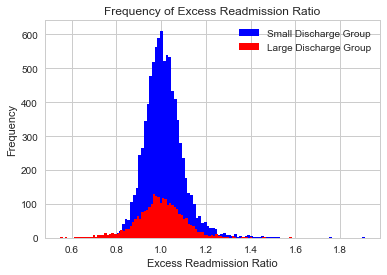

In [172]:
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])
bins= 100
_= plt.hist(group_small, bins, color= 'blue', label='Small Discharge Group')
_= plt.hist(big_group, bins, color= 'red', label='Large Discharge Group')
_= plt.title('Frequency of Excess Readmission Ratio')
_= plt.xlabel('Excess Readmission Ratio')
_= plt.ylabel('Frequency')
_= plt.legend(loc= 'upper right')
_= plt.show()

This histogram makes 2 things very clear:
The data group of large and small discharges are very different sizes. That is, a lot more hospitals discharge less then 500 patients then more then 500 patients. 
However, given the huge difference in the number sets I want to try one more graph, to look at the distribution of the data more. 

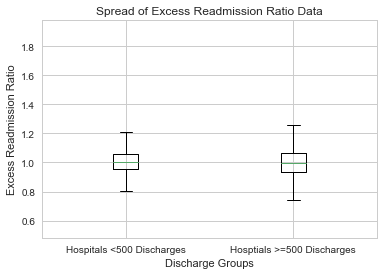

In [190]:
group_both= ( group_small, big_group)
_=plt.boxplot(group_both)
_= plt.title('Spread of Excess Readmission Ratio Data')
_= plt.xlabel( 'Discharge Groups')
_= plt.ylabel('Excess Readmission Ratio')
_=plt.xticks( [1,2],['Hospitals <500 Discharges', 'Hosptials >=500 Discharges'])

plt.show()

So the mean of both are almost the same at ~1.0 excess readmission ratio. Which makes sense. However, the hospitals with more discharges (specifically more then 500) have a wider range of results, including a larger max readmission ratio. Which is contradictory to the previous conclusion that smaller hospitals had a higher rate. Looking at both graphs together we have a better understanding of the data. 